In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.decomposition import PCA
from scipy.spatial import distance_matrix

mydata = pd.read_csv('/Users/rickardfrumerie/Documents/Jupyter/zoo.data', header=None)
Type = mydata.drop(mydata.columns[0:17], 1)
labels = mydata.drop(mydata.columns[1:18], 1)
mydata = mydata.drop(mydata.columns[17], 1)
mydata = mydata.drop(mydata.columns[0], 1)

mydata[mydata.columns[12]] = mydata[mydata.columns[12]]*1/8 #scale the non boolean to have same interval
mydata

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,0,0,1,0,0,1,1,1,1,0,0,0.50,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,0.50,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0.00,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,0.50,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,0.50,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,0.25,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,0.75,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,0.50,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0.00,0,0,0


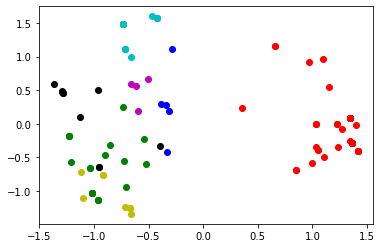

In [5]:
#PCA
pca = PCA(n_components=2)
mydata_reduced = pca.fit_transform(mydata)

colors = np.array(['r', 'g', 'b', 'c', 'm', 'y', 'k'])
for i in range(len(mydata_reduced)):
    color=colors[Type.iat[i,0]-1]
    plt.scatter(mydata_reduced[i, 0], mydata_reduced[i, 1], color=color)

/Users/rickardfrumerie/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


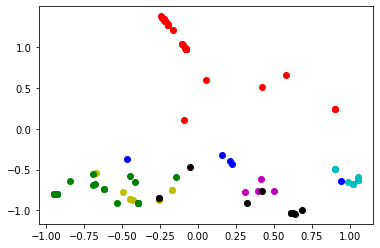

In [6]:
#IsoMap
#Build the neighbourhood graph
delta = distance_matrix(mydata, mydata)
k = 20 #converges at 20
delta_knn = np.ones(delta.shape)*np.inf
for i in range(len(delta)):
    delta[i, i] = np.inf   #so it isnt choosen as smallest distance
    index = np.argsort(delta[i,:])[:k]
    row_knn = delta_knn[i,:]
    delta_knn[i, i] = 0
    for j in range(k):
        delta_knn[i, index[j]] = delta[i, index[j]]

#Floyd-Warshall alogrithm
for k in range(len(delta_knn)):
    for i in range(len(delta_knn)):
        for j in range(len(delta_knn)):
            if delta_knn[i, j] > delta_knn[i, k] + delta_knn[k, j]:
                delta_knn[i, j] = delta_knn[i, k] + delta_knn[k, j]


#Apply MDS
n = len(delta_knn)
one = np.ones((n,1))
S = -1/2*(delta_knn - 1/n * np.dot(delta_knn, np.dot(one, one.T)) - 1/n * np.dot(one, np.dot(one.T, delta_knn)) + 1/n**2  * np.dot(one, np.dot(one.T, np.dot(delta_knn, np.dot(one, one.T)))))
sigma, U = np.linalg.eig(S)
sigma_sqrt = np.sqrt(sigma)
ind = np.argsort(sigma)[-2:]
XX = np.array([sigma_sqrt[ind[0]]*U[:, ind[0]], sigma_sqrt[ind[1]]*U[:, ind[1]]]).T

colors = np.array(['r', 'g', 'b', 'c', 'm', 'y', 'k'])
for i in range(len(XX)):
    color=colors[Type.iat[i,0]-1]
    plt.scatter(XX[i, 0], XX[i, 1], color=color)     

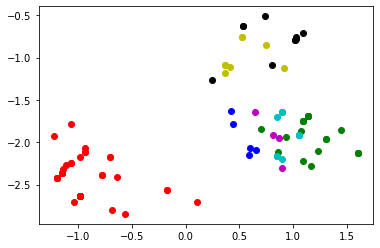

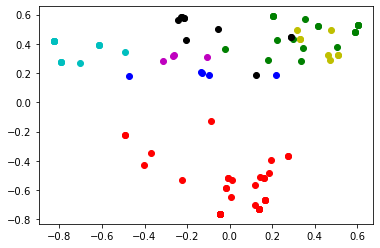

In [10]:
#MDS

YT = mydata.T.values
Y = mydata.values

#weights
#YT[4,:] = YT[4,:]*10 #airborne
#YT[5,:] = YT[5,:]*15 #aquatic
#YT[6,:] = YT[6,:]*5 #preditor
#YT[11,:] = YT[11,:]*0.1 #fins
#YT[10,:] = YT[10,:]*15 #venomous

S = np.dot(Y, YT)
sigma, U = np.linalg.eig(S)
sigma_sqrt = np.sqrt(sigma)
ind = np.argsort(sigma)[-2:]
X = np.array([sigma_sqrt[ind[0]]*U[:, ind[0]], sigma_sqrt[ind[1]]*U[:, ind[1]]]).T

colors = np.array(['r', 'g', 'b', 'c', 'm', 'y', 'k'])
for i in range(len(X)):
    color=colors[Type.iat[i,0]-1]
    plt.figure(0)
    plt.scatter(X[i, 0], X[i, 1], color=color)
    
#Do for D aswell
D = distance_matrix(mydata, mydata)
n = len(D)
one = np.ones((n,1))
S2 = -1/2*(D - 1/n * np.dot(D, np.dot(one, one.T)) - 1/n * np.dot(one, np.dot(one.T, D)) + 1/n**2  * np.dot(one, np.dot(one.T, np.dot(D, np.dot(one, one.T)))))
sigma2, U2 = np.linalg.eig(S2)
sigma_sqrt2 = np.sqrt(sigma2)
ind2 = np.argsort(sigma2)[-2:]
X2 = np.array([sigma_sqrt2[ind2[0]]*U2[:, ind2[0]], sigma_sqrt2[ind2[1]]*U2[:, ind2[1]]]).T

colors = np.array(['r', 'g', 'b', 'c', 'm', 'y', 'k'])
for i in range(len(X2)):
    color=colors[Type.iat[i,0]-1]
    plt.figure(1)
    plt.scatter(X2[i, 0], X2[i, 1], color=color)